Graphs and visualization
========================

A lot of the joy of digital humanities comes in handling our material in new ways, so that we see things we wouldn't have seen before. Quite literally.

Some of the most useful tools for DH work are graphing tools! Today we will look at the basics of what a graph is and how you might build one, both manually and programmatically, and then name the tools to look into if you want to know more.

Tools you'll need
-----------------

* Graphviz: http://www.graphviz.org
* The graphviz and sphinx modules for Python, which you can install from iPython like this. **You only have to do this once!**


In [1]:
!pip install graphviz sphinx

You are using pip version 8.1.0, however version 8.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


So what can you do with graphs?

<img src="https://i.embed.ly/1/display/resize?key=1e6a1a1efdb011df84894040444cdc60&url=http%3A%2F%2Fpbs.twimg.com%2Fmedia%2FBslvzfjIcAAW6Ro.png">

You can visualize relationships, networks, you name it.

http://ckcc.huygens.knaw.nl/epistolarium/#


The DOT graph language
----------------------

It's pretty easy to start building a graph, if you have the tools and a plain text editor. First you have to decide whether you want a *directed* or an *undirected* graph. If all the relationships you want to chart are symmetric and two-way (e.g. "these words appear together" or "these people corresponded", then it can be undirected. But if there is any asymmetry (e.g. in social networks - just because Tom is friends with Jane doesn't mean that Jane is friends with Tom!) then you want a directed graph.

If you want to make a directed graph, it looks like this:

    digraph "My graph" {
        [... graph data goes here ...]
    }
    
and if you want to make an undirected graph, it looks like this.

    graph "My graph" {
        [... graph data goes here ...]
    }
    
Let's say we want to make that little two-person social network. In graph terms, you have *nodes* and *edges*. The edges are the relationships, and the nodes are the things (people, places, dogs, cats, whatever) that are related. The easiest way to express that is like this:

    digraph "My graph" {
        Tom -> Jane
    }

which says "The node `Tom` is connected to the node `Jane`, in that direction." We plug that into Graphviz, and what do we get? Let's use a little iPython magic to find out.

We are going to use an extension called 'hierarchymagic', which gives us the special `%%dot` command. You can install the extension like this. <br>**You only have to do this once!**

You will get a warning that "install_ext" is deprecated; there isn't much we can do about this ourselves, so don't worry unduly about it.

In [2]:
%install_ext http://students.digihum.ch/hierarchymagic.py

Installed hierarchymagic.py. To use it, type:
  %load_ext hierarchymagic


/Users/tla/anaconda/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


Now anytime you want to use graphs in IPython, this is how you do it.

In [3]:
# This is how you get the %%dot command that we use below.
%load_ext hierarchymagic  

Then you do this every time you want to make a graph. The `-f svg` says that it should make an SVG image, which is what I recommend.

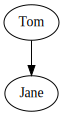

In [4]:
%%dot -f svg
digraph "My graph" {
    Tom -> Jane
}

Now maybe Tom has a friend too:

    digraph "My graph" {
        Tom -> Jane
        Ben -> Tom
        Tom -> Ben
    }



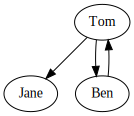

In [5]:
%%dot -f svg
digraph "My graph" {
    Tom -> Jane
    Ben -> Tom
    Tom -> Ben
}

...And so on. But what if we do want a nice symmetrical undirected graph? That is even simpler. Instead of `digraph` we say `graph`, and instead of describing the connections with `->` we use `--` instead. If we have a model like Facebook where friendship is always two-way, we can do this:

    graph "My graph" {
        Tom -- Jane
        Ben -- Tom
    }

Note that we don't need the third line (`Tom -- Ben`) because it is now the same as saying `Ben -- Tom`.

Since this is an undirected graph, we want it to be laid out a little differently (not just straight up-and-down.) For this we can specify a different program with this `-- -K` flag. The options are `dot` (the default), `neato`, `twopi`, `circo`, `fdp`, and `sfdp`; they all take different approaches and you are welcome to play around with each one.

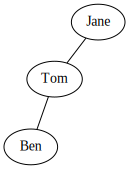

In [6]:
%%dot -f svg
graph "My graph" {
    graph [layout=neato]
    Tom -- Jane
    Ben -- Tom
}

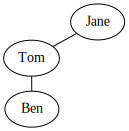

In [7]:
%%dot -f svg
graph "My graph" {
    layout=fdp
    Tom -- Jane
    Ben -- Tom
}

You can change the font, the shape of the nodes, the colors of the links, and so on by setting attributes in square brackets. Attributes can be set for the graph, for all nodes, for all edges, and for individual nodes and edges. All the different attribute options can be read about [here](http://www.graphviz.org/doc/info/attrs.html).

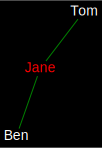

In [8]:
%%dot -f svg
graph "My pretty graph" {
    graph [layout=neato, bgcolor=black]
    node [shape=plain, fontcolor=white, fontname=Helvetica]
    Jane [fontcolor=red]
    Tom -- Jane [color=green]
    Jane -- Ben [color=green]    
}

Of course, this would hardly be fun if we couldn't do it programmatically!

Building graphs with Graphviz + Python
--------------------------------------

Now we are going to make a few graphs, not by writing out dot, but by making a *graph object* that holds our nodes and edges. We do this with the `graphviz` module. 

In [9]:
import graphviz     # Use the Python graphviz library

We make a new directed graph with `graphviz.Digraph()`, and a new undirected graph with `graphviz.Graph()`.

In [10]:
my_graph = graphviz.Digraph()

Let's make a social network graph of five friends, all of whom like each other. But instead of typing out all those

    Anna -> Ben
    
sorts of lines, we will let the program do that for us.

In [11]:
# Our list of friends
all_friends = [ 'Jane', 'Ben', 'Tom', 'Anna', 'Charlotte' ]

# Make them all friends with each other.
# As long as there are at least two people left in the list of friends...
while len( all_friends ) > 1:
    this_friend = all_friends.pop() # Remove the last name from the list
    for friend in all_friends:      # Cycle through whoever is left and make them friends with each other
        my_graph.edge( this_friend, friend )  # I like you
        my_graph.edge( friend, this_friend )  # You like me

# Spit out the graph in its DOT format
print(my_graph.source)

digraph {
		Charlotte -> Jane
		Jane -> Charlotte
		Charlotte -> Ben
		Ben -> Charlotte
		Charlotte -> Tom
		Tom -> Charlotte
		Charlotte -> Anna
		Anna -> Charlotte
		Anna -> Jane
		Jane -> Anna
		Anna -> Ben
		Ben -> Anna
		Anna -> Tom
		Tom -> Anna
		Tom -> Jane
		Jane -> Tom
		Tom -> Ben
		Ben -> Tom
		Ben -> Jane
		Jane -> Ben
}


And here is a little iPython magic function so that we can actually make the graph display right here in the notebook. This means that, instead of copy-pasting what you see above into a new cell, you can just ask IPython to do the copy-pasting for you! 

Don't worry too much about understanding this (unless you want to!) but we will use it a little farther down. You can ignore the lines about "Couldn't evaluate or find in history" - that seems to be a little IPython bug!

In [12]:
## Here is the function we need
def make_dotcell( thegraph, format="svg" ):
    cell_content = "%%dot " + "-f %s\n%s" % (format, thegraph.source)
    return cell_content

## ...and here is how to use it. This will make a new cell that you can then 'play' to get the graph.
%recall make_dotcell( my_graph )

Couldn't evaluate or find in history: make_dotcell( my_graph )


In [ ]:
%%dot -f svg
digraph {
		Charlotte -> Jane
		Jane -> Charlotte
		Charlotte -> Ben
		Ben -> Charlotte
		Charlotte -> Tom
		Tom -> Charlotte
		Charlotte -> Anna
		Anna -> Charlotte
		Anna -> Jane
		Jane -> Anna
		Anna -> Ben
		Ben -> Anna
		Anna -> Tom
		Tom -> Anna
		Tom -> Jane
		Jane -> Tom
		Tom -> Ben
		Ben -> Tom
		Ben -> Jane
		Jane -> Ben
}

Basic usage for the Graphviz python library
-------------------------------------------

So here is a short summary of what we did above that you will want to remember:

In [13]:
import graphviz;

this_graph = graphviz.Digraph()    # start your directed graph
this_undirected = graphviz.Graph() # ...or your undirected graph

this_graph.edge( "me", "you" )   # Add a relationship between me and you
this_undirected.edge( "me", "you" )

print(this_graph.source)       # Print out the dot.
print(this_undirected.source)

digraph {
		me -> you
}
graph {
		me -- you
}


Labels and IDs
--------------

When you are making a graph, it is important that every node be unique - if you have two people named Tom, then the graph program will have no idea which Tom is friends with Anna. So how do you handle having two people named Tom, without resorting to last names or AHV numbers or something like that?

You use *attributes* in the graph, and specifically the *label* attribute. It looks something like this:

    graph G {
        Tom1 [ label="Tom" ]
        Tom2 [ label="Tom" ]
        Tom1 -- Anna
        Tom1 -- Tom2
    }

Before this, we only named our nodes when we needed them to define a relationship (an edge). But if we need to give any extra information about a node, such as a label, then we have to list it first, on its own line, with the extra information between the square brackets.

There are a whole lot of options for things you might want to define! Most of them have to do with how the graph should look, and we will look at them in a minute. For now, this is what we get for this graph:

In [14]:
lg = graphviz.Graph()   # Make this one undirected
lg.graph_attr['layout'] = 'neato'
lg.node( "Tom1", label="Tom" )
lg.node( "Tom2", label="Tom" )
lg.edge( "Tom1", "Anna", label="siblings" )
lg.edge( "Tom1", "Tom2", label="friends" )

%recall make_dotcell(lg)

Couldn't evaluate or find in history: make_dotcell(lg)


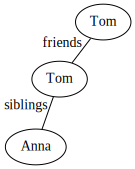

In [15]:
%%dot -f svg
graph {
	graph [layout=neato]
		Tom1 [label=Tom]
		Tom2 [label=Tom]
			Tom1 -- Anna [label=siblings]
			Tom1 -- Tom2 [label=friends]
}

Notice, in this, that Anna still popped into existence when we referred to her in a relationship. But in the real world, we will probably want to declare our nodes with (for example) student numbers as the unique identifier, and names for display in the graph.

Styling the graph
-----------------

We can also set attributes on a graph using Python. Imagine that we want a graph that displays the relationships between members of a family and where they go each day.

Here's how we can do that in python, and what we get.

In [16]:
family_members = ["Tara", "Mike", "Sophie"]
places = ["work", "school"]

# Make the graph
family = graphviz.Digraph()
# Set some defaults
family.graph_attr = {"bgcolor": "black"}
family.node_attr = {'fontcolor': "red" }
family.edge_attr = {'fontcolor': "white", 'color': "white"}

# Add the family members
for member in family_members:
    family.node(member)
# Add the places they go
for place in places:
    family.node(place, shape="house", color="blue", fontcolor="white")

# Set up the relationships
family.edge( "Tara", "Sophie", label="is mother", color="green", fontcolor="green" )
family.edge( "Mike", "Sophie", label="is father", color="green", fontcolor="green" )
family.edge( "Tara", "work", label="goes to" )
family.edge( "Mike", "work", label="goes to" )
family.edge( "Sophie", "school", label="goes to" )

# Make the cell with the dot
%recall make_dotcell( family )

Couldn't evaluate or find in history: make_dotcell( family )


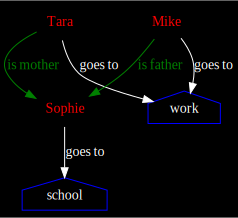

In [17]:
%%dot -f svg
digraph {
	graph [bgcolor=black]
	node [fontcolor=red]
	edge [color=white fontcolor=white]
		Tara
		Mike
		Sophie
		work [color=blue fontcolor=white shape=house]
		school [color=blue fontcolor=white shape=house]
			Tara -> Sophie [label="is mother" color=green fontcolor=green]
			Mike -> Sophie [label="is father" color=green fontcolor=green]
			Tara -> work [label="goes to"]
			Mike -> work [label="goes to"]
			Sophie -> school [label="goes to"]
}

All done! There are a huge number of styling attributes - ways to control line thickness, color, shape, graph direction, and so on. They are documented in eye-watering detail here:

http://www.graphviz.org/content/attrs

Have fun!